In [16]:
import pandas as pd
import numpy as np
import cv2
import os
import pickle
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from matplotlib import pyplot as plt

In [2]:
# Create dictionary for alphabets and related numbers
alphabets_dic = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
             20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1', 28: '2', 29:'3',
             30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'}

alphabets = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
dataset_classes = []

for cls in alphabets:
    dataset_classes.append([cls])

In [3]:
# Load dataset
d = open("./data/alternate_data.pickle","rb")
l = open("./data/alternate_data_labels.pickle","rb")
data = pickle.load(d)
labels = pickle.load(l)
label_list = []
for l in labels:
    label_list.append([l])

In [4]:
# One hot encoding format for output
ohe = OneHotEncoder(handle_unknown='ignore', categorical_features=None)
ohe.fit(dataset_classes)
labels_ohe = ohe.transform(label_list).toarray()

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28)
(7316, 28, 28)
(29260, 36)
(7316, 36)


In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28, 1)
(7316, 28, 28, 1)
(29260, 36)
(7316, 36)


## Train final model with finalized hyperparameters

In [8]:
# Model Configurations
num_folds = 10
batch_size = 64
no_epochs = 50
verbosity = 1

In [9]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [10]:
os.makedirs(os.path.dirname('./models/history/'), exist_ok=True)

------------------------------------------------------------------------
Training for fold: 1
Epoch 1/50
515/515 [==============================] - 35s 68ms/step - loss: 1.8115 - accuracy: 0.5032 - val_loss: 0.3921 - val_accuracy: 0.8887
Epoch 2/50
515/515 [==============================] - 34s 66ms/step - loss: 0.5535 - accuracy: 0.8411 - val_loss: 0.3048 - val_accuracy: 0.9183
Epoch 3/50
515/515 [==============================] - 34s 66ms/step - loss: 0.4056 - accuracy: 0.8856 - val_loss: 0.2442 - val_accuracy: 0.9300
Epoch 4/50
515/515 [==============================] - 34s 67ms/step - loss: 0.3390 - accuracy: 0.9011 - val_loss: 0.2137 - val_accuracy: 0.9374
Epoch 5/50
515/515 [==============================] - 34s 66ms/step - loss: 0.2986 - accuracy: 0.9117 - val_loss: 0.2004 - val_accuracy: 0.9415
Epoch 6/50
515/515 [==============================] - 34s 66ms/step - loss: 0.2718 - accuracy: 0.9200 - val_loss: 0.1888 - val_accuracy: 0.9442
Epoch 7/50
515/515 [======================

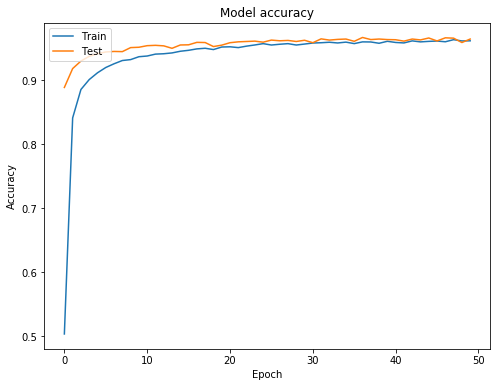

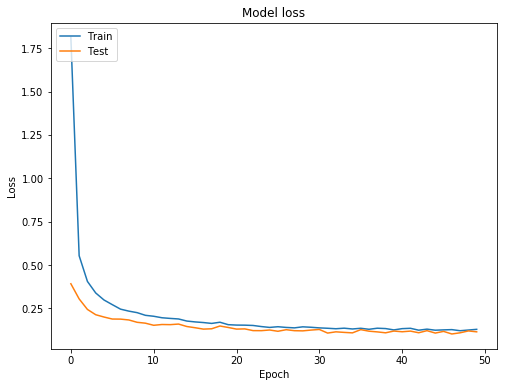

------------------------------------------------------------------------
Training for fold: 2
Epoch 1/50
515/515 [==============================] - 35s 68ms/step - loss: 2.1068 - accuracy: 0.3964 - val_loss: 0.4703 - val_accuracy: 0.8835
Epoch 2/50
515/515 [==============================] - 34s 66ms/step - loss: 0.6606 - accuracy: 0.8048 - val_loss: 0.2969 - val_accuracy: 0.9215
Epoch 3/50
515/515 [==============================] - 34s 66ms/step - loss: 0.4607 - accuracy: 0.8662 - val_loss: 0.2390 - val_accuracy: 0.9393
Epoch 4/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3632 - accuracy: 0.8931 - val_loss: 0.2087 - val_accuracy: 0.9429
Epoch 5/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3211 - accuracy: 0.9053 - val_loss: 0.1857 - val_accuracy: 0.9494
Epoch 6/50
515/515 [==============================] - 35s 67ms/step - loss: 0.2847 - accuracy: 0.9144 - val_loss: 0.1616 - val_accuracy: 0.9549
Epoch 7/50
515/515 [======================

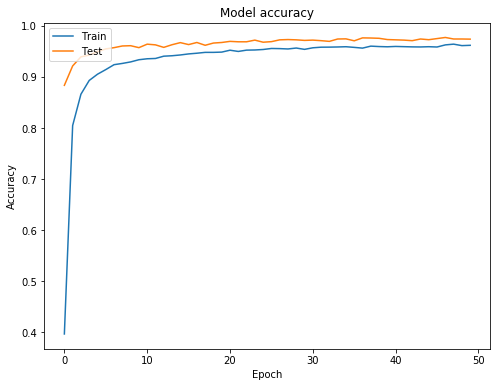

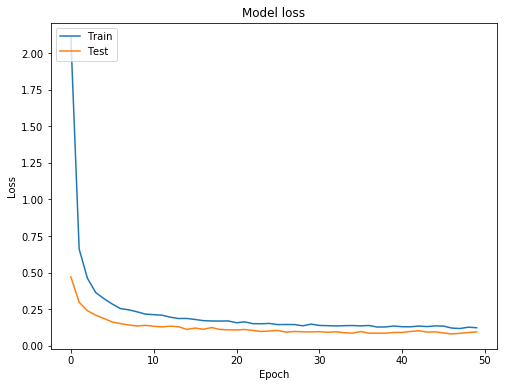

------------------------------------------------------------------------
Training for fold: 3
Epoch 1/50
515/515 [==============================] - 34s 67ms/step - loss: 1.8692 - accuracy: 0.4818 - val_loss: 0.3967 - val_accuracy: 0.8991
Epoch 2/50
515/515 [==============================] - 34s 65ms/step - loss: 0.5600 - accuracy: 0.8411 - val_loss: 0.2795 - val_accuracy: 0.9232
Epoch 3/50
515/515 [==============================] - 34s 66ms/step - loss: 0.4159 - accuracy: 0.8796 - val_loss: 0.2187 - val_accuracy: 0.9358
Epoch 4/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3414 - accuracy: 0.9011 - val_loss: 0.2031 - val_accuracy: 0.9453
Epoch 5/50
515/515 [==============================] - 35s 68ms/step - loss: 0.3056 - accuracy: 0.9101 - val_loss: 0.1678 - val_accuracy: 0.9508
Epoch 6/50
515/515 [==============================] - 34s 66ms/step - loss: 0.2713 - accuracy: 0.9186 - val_loss: 0.1670 - val_accuracy: 0.9440
Epoch 7/50
515/515 [======================

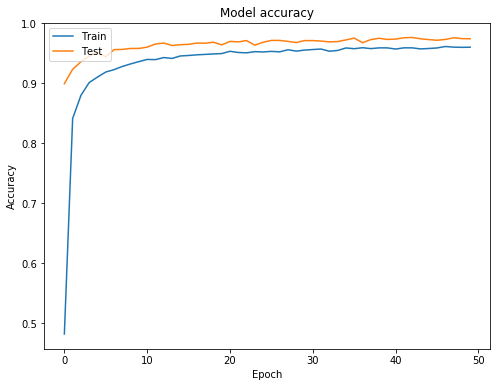

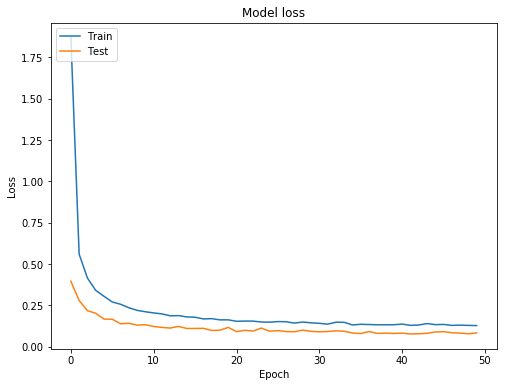

------------------------------------------------------------------------
Training for fold: 4
Epoch 1/50
515/515 [==============================] - 34s 66ms/step - loss: 2.1259 - accuracy: 0.4062 - val_loss: 0.4502 - val_accuracy: 0.8783
Epoch 2/50
515/515 [==============================] - 34s 66ms/step - loss: 0.6254 - accuracy: 0.8218 - val_loss: 0.3178 - val_accuracy: 0.9131
Epoch 3/50
515/515 [==============================] - 34s 66ms/step - loss: 0.4322 - accuracy: 0.8728 - val_loss: 0.2575 - val_accuracy: 0.9303
Epoch 4/50
515/515 [==============================] - 34s 67ms/step - loss: 0.3612 - accuracy: 0.8957 - val_loss: 0.2297 - val_accuracy: 0.9338
Epoch 5/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3127 - accuracy: 0.9085 - val_loss: 0.1892 - val_accuracy: 0.9470
Epoch 6/50
515/515 [==============================] - 34s 66ms/step - loss: 0.2832 - accuracy: 0.9167 - val_loss: 0.1728 - val_accuracy: 0.9505
Epoch 7/50
515/515 [======================

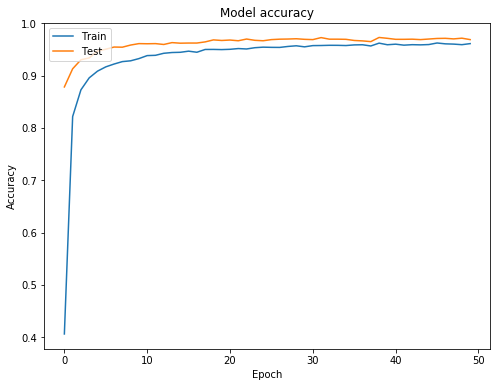

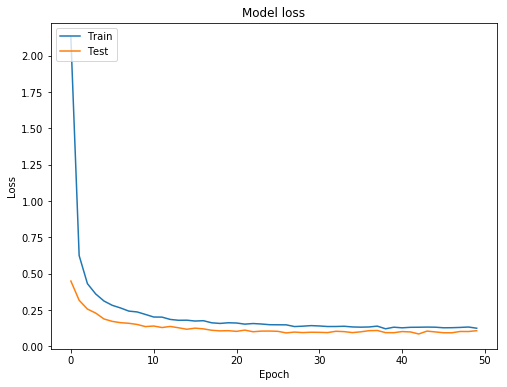

------------------------------------------------------------------------
Training for fold: 5
Epoch 1/50
515/515 [==============================] - 34s 67ms/step - loss: 1.9915 - accuracy: 0.4373 - val_loss: 0.4227 - val_accuracy: 0.8849
Epoch 2/50
515/515 [==============================] - 33s 65ms/step - loss: 0.6019 - accuracy: 0.8236 - val_loss: 0.2675 - val_accuracy: 0.9226
Epoch 3/50
515/515 [==============================] - 34s 67ms/step - loss: 0.4233 - accuracy: 0.8769 - val_loss: 0.2232 - val_accuracy: 0.9349
Epoch 4/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3463 - accuracy: 0.8988 - val_loss: 0.1955 - val_accuracy: 0.9426
Epoch 5/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3028 - accuracy: 0.9106 - val_loss: 0.1800 - val_accuracy: 0.9451
Epoch 6/50
515/515 [==============================] - 34s 65ms/step - loss: 0.2764 - accuracy: 0.9166 - val_loss: 0.1658 - val_accuracy: 0.9519
Epoch 7/50
515/515 [======================

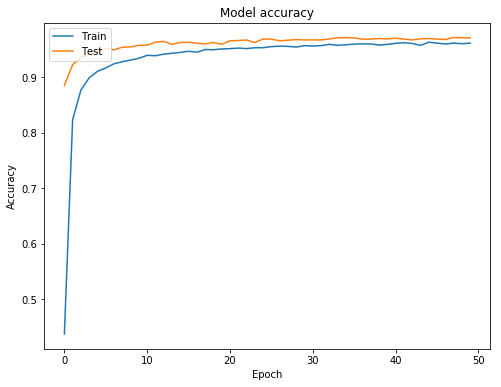

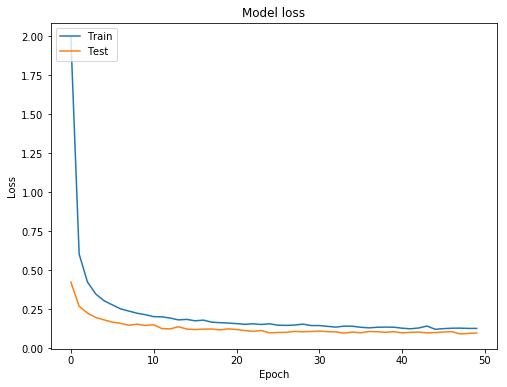

------------------------------------------------------------------------
Training for fold: 6
Epoch 1/50
515/515 [==============================] - 37s 71ms/step - loss: 1.9200 - accuracy: 0.4572 - val_loss: 0.4216 - val_accuracy: 0.8909
Epoch 2/50
515/515 [==============================] - 36s 70ms/step - loss: 0.5799 - accuracy: 0.8318 - val_loss: 0.2579 - val_accuracy: 0.9251
Epoch 3/50
515/515 [==============================] - 36s 70ms/step - loss: 0.4154 - accuracy: 0.8804 - val_loss: 0.2398 - val_accuracy: 0.9273
Epoch 4/50
515/515 [==============================] - 37s 71ms/step - loss: 0.3413 - accuracy: 0.9003 - val_loss: 0.1948 - val_accuracy: 0.9393
Epoch 5/50
515/515 [==============================] - 36s 70ms/step - loss: 0.3019 - accuracy: 0.9115 - val_loss: 0.1942 - val_accuracy: 0.9363
Epoch 6/50
515/515 [==============================] - 37s 71ms/step - loss: 0.2780 - accuracy: 0.9175 - val_loss: 0.1711 - val_accuracy: 0.9448
Epoch 7/50
515/515 [======================

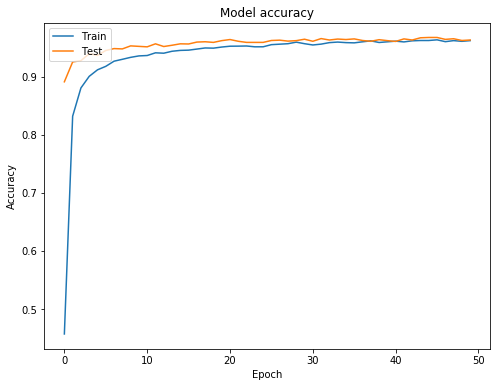

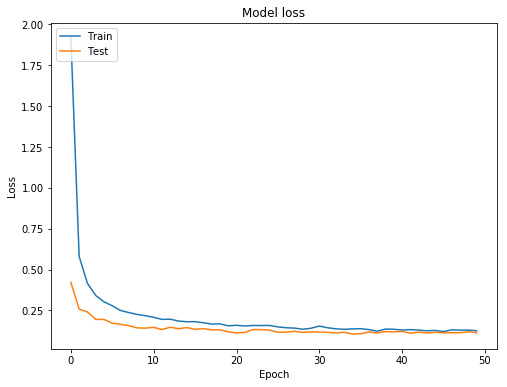

------------------------------------------------------------------------
Training for fold: 7
Epoch 1/50
515/515 [==============================] - 35s 68ms/step - loss: 2.1371 - accuracy: 0.3910 - val_loss: 0.4979 - val_accuracy: 0.8507
Epoch 2/50
515/515 [==============================] - 36s 70ms/step - loss: 0.6180 - accuracy: 0.8215 - val_loss: 0.2903 - val_accuracy: 0.9223
Epoch 3/50
515/515 [==============================] - 36s 69ms/step - loss: 0.4180 - accuracy: 0.8814 - val_loss: 0.2281 - val_accuracy: 0.9327
Epoch 4/50
515/515 [==============================] - 36s 71ms/step - loss: 0.3384 - accuracy: 0.9015 - val_loss: 0.1961 - val_accuracy: 0.9404
Epoch 5/50
515/515 [==============================] - 33s 63ms/step - loss: 0.2983 - accuracy: 0.9124 - val_loss: 0.1812 - val_accuracy: 0.9437
Epoch 6/50
515/515 [==============================] - 34s 67ms/step - loss: 0.2721 - accuracy: 0.9208 - val_loss: 0.1641 - val_accuracy: 0.9505
Epoch 7/50
515/515 [======================

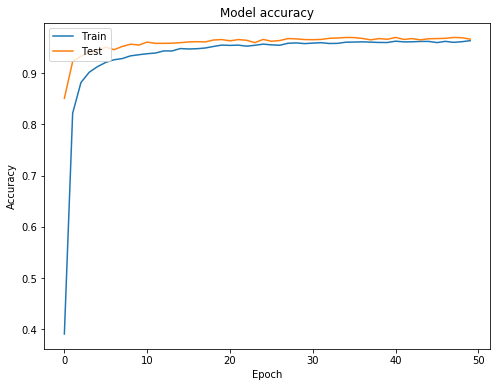

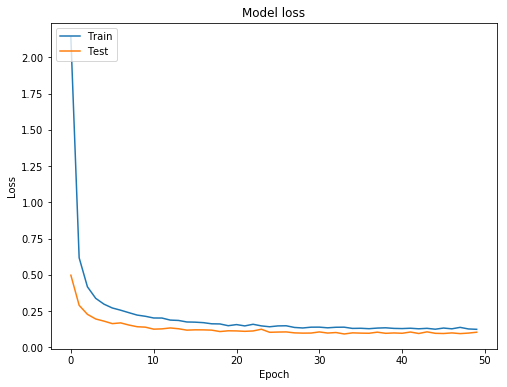

------------------------------------------------------------------------
Training for fold: 8
Epoch 1/50
515/515 [==============================] - 36s 71ms/step - loss: 1.5793 - accuracy: 0.5579 - val_loss: 0.4010 - val_accuracy: 0.8936
Epoch 2/50
515/515 [==============================] - 37s 71ms/step - loss: 0.4992 - accuracy: 0.8562 - val_loss: 0.2730 - val_accuracy: 0.9245
Epoch 3/50
515/515 [==============================] - 36s 71ms/step - loss: 0.3739 - accuracy: 0.8907 - val_loss: 0.2312 - val_accuracy: 0.9379
Epoch 4/50
515/515 [==============================] - 36s 69ms/step - loss: 0.3193 - accuracy: 0.9070 - val_loss: 0.2034 - val_accuracy: 0.9431
Epoch 5/50
515/515 [==============================] - 36s 70ms/step - loss: 0.2833 - accuracy: 0.9153 - val_loss: 0.1916 - val_accuracy: 0.9459
Epoch 6/50
515/515 [==============================] - 36s 69ms/step - loss: 0.2524 - accuracy: 0.9243 - val_loss: 0.1722 - val_accuracy: 0.9519
Epoch 7/50
515/515 [======================

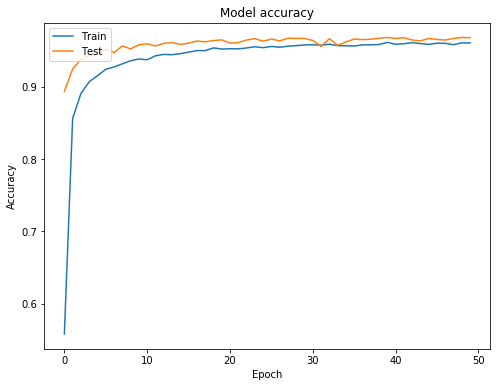

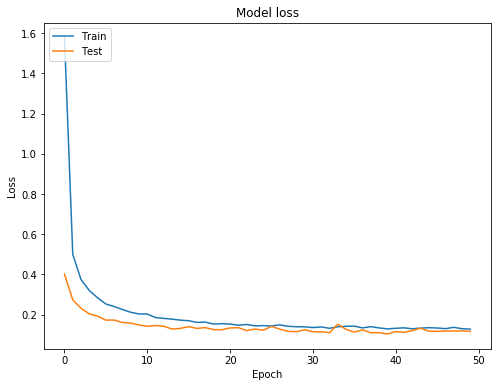

------------------------------------------------------------------------
Training for fold: 9
Epoch 1/50
515/515 [==============================] - 34s 65ms/step - loss: 1.7088 - accuracy: 0.5167 - val_loss: 0.3641 - val_accuracy: 0.8996
Epoch 2/50
515/515 [==============================] - 33s 65ms/step - loss: 0.5139 - accuracy: 0.8512 - val_loss: 0.2553 - val_accuracy: 0.9251
Epoch 3/50
515/515 [==============================] - 34s 65ms/step - loss: 0.3766 - accuracy: 0.8905 - val_loss: 0.2099 - val_accuracy: 0.9374
Epoch 4/50
515/515 [==============================] - 34s 66ms/step - loss: 0.3229 - accuracy: 0.9045 - val_loss: 0.1878 - val_accuracy: 0.9439
Epoch 5/50
515/515 [==============================] - 33s 65ms/step - loss: 0.2822 - accuracy: 0.9165 - val_loss: 0.1756 - val_accuracy: 0.9489
Epoch 6/50
515/515 [==============================] - 34s 65ms/step - loss: 0.2567 - accuracy: 0.9239 - val_loss: 0.1655 - val_accuracy: 0.9489
Epoch 7/50
515/515 [======================

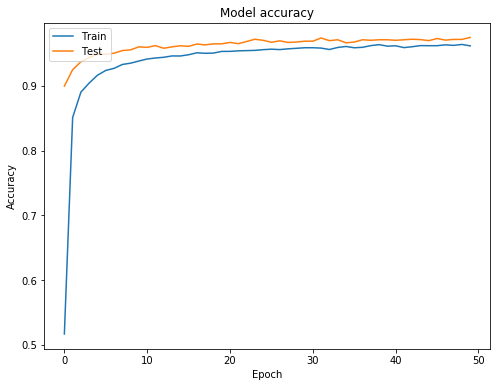

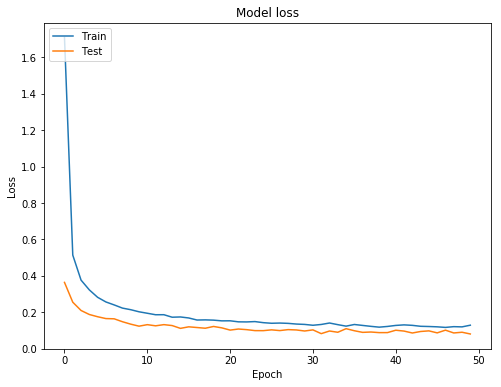

------------------------------------------------------------------------
Training for fold: 10
Epoch 1/50
515/515 [==============================] - 34s 65ms/step - loss: 2.0158 - accuracy: 0.4393 - val_loss: 0.4254 - val_accuracy: 0.8794
Epoch 2/50
515/515 [==============================] - 33s 65ms/step - loss: 0.5962 - accuracy: 0.8263 - val_loss: 0.2781 - val_accuracy: 0.9161
Epoch 3/50
515/515 [==============================] - 33s 65ms/step - loss: 0.4367 - accuracy: 0.8727 - val_loss: 0.2349 - val_accuracy: 0.9240
Epoch 4/50
515/515 [==============================] - 34s 65ms/step - loss: 0.3537 - accuracy: 0.9001 - val_loss: 0.1957 - val_accuracy: 0.9379
Epoch 5/50
515/515 [==============================] - 33s 64ms/step - loss: 0.3059 - accuracy: 0.9107 - val_loss: 0.1731 - val_accuracy: 0.9470
Epoch 6/50
515/515 [==============================] - 32s 62ms/step - loss: 0.2709 - accuracy: 0.9193 - val_loss: 0.1667 - val_accuracy: 0.9467
Epoch 7/50
515/515 [=====================

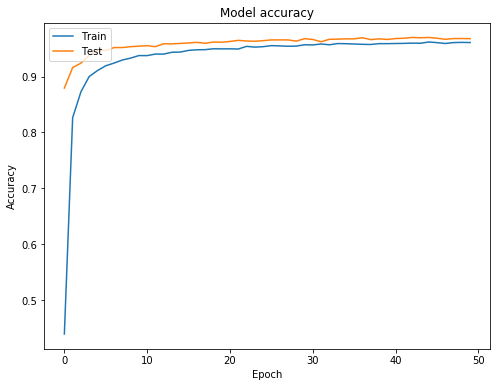

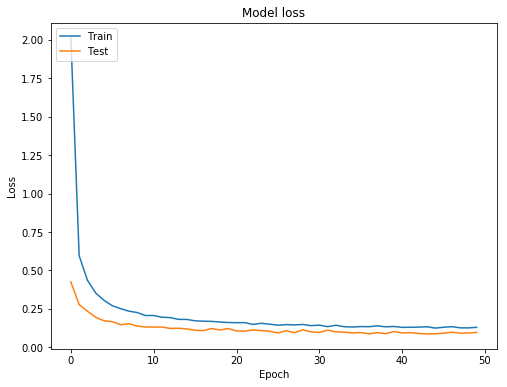

In [11]:
# K-fold (10-fold) Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    # CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(36, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print('Training for fold: {}'.format(fold_no))

    # Fit data to model
    history = model.fit(inputs[train], targets[train], validation_data=(inputs[test], targets[test]), batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print('Score for fold {}: {} of {}; {} of {}%'.format(fold_no, model.metrics_names[0], scores[0], model.metrics_names[1], scores[1]*100))
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Visualization
    plt.figure(figsize=[8, 6])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('./models/history/accuracy_fold_{}.png'.format(fold_no))

    plt.figure(figsize=[8, 6])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('./models/history/loss_fold_{}.png'.format(fold_no))

    plt.show()

    # Increase fold number
    fold_no = fold_no + 1

In [12]:
model.save('./models/cnn_ocr_classifier.h5')

In [18]:
print("Accuracy per fold: {}".format(acc_per_fold))
print("Loss per fold: {}".format(loss_per_fold))
print("*******************************************")
print("Average accuracy per fold: {}% (+-{}%)".format(round(sum(acc_per_fold) / len(acc_per_fold), 2), statistics.pstdev(acc_per_fold)))
print("Average loss per fold: {} (+-{})".format(round(sum(loss_per_fold) / len(loss_per_fold), 2), statistics.pstdev(loss_per_fold)))

Accuracy per fold: [96.44614458084106, 97.4029541015625, 97.4029541015625, 96.88354134559631, 97.0749020576477, 96.28211855888367, 96.60924077033997, 96.80065512657166, 97.48427867889404, 96.7733085155487]
Loss per fold: [0.11512640863656998, 0.09446059912443161, 0.0845160037279129, 0.10874975472688675, 0.09604353457689285, 0.11325222253799438, 0.10485024005174637, 0.11591360718011856, 0.08090448379516602, 0.09708166867494583]
*******************************************
Average accuracy per fold: 96.92% (+-0.39671513696899297%)
Average loss per fold: 0.1 (+-0.011853800689826877)


In [13]:
# # CNN model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(36, activation='softmax'))

# print(model.summary())

In [14]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)
# model.save('./models/cnn_ocr_classifier.h5')

In [15]:
# # Visualization
# plt.figure(figsize=[8, 6])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('accuracy.png')

# plt.figure(figsize=[8, 6])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('loss.png')

# plt.show()